<a href="https://colab.research.google.com/github/adi1970/Custombersegmention/blob/main/Task_Submission_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Customer Segmentation**
Understanding your customers is critical to success. It allows you to create messaging and offers that resonate with your audience, rather than guessing about their preferences and needs.

And taking it a step further, segmenting customers into groups based on similarities helps you develop a deeper understanding of those groups.

Customer segmentation is the process of dividing a company’s customers into groups based on common characteristics so companies can market to each group effectively and appropriately.

![picture](https://drive.google.com/uc?export=view&id=1LA_GeIUgM5ioxhLeLQNF042CZU4QyUxb)


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
path='drive/My Drive/Dataset'

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv(path+"/Mall Customers.csv")
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
a,b=df.shape
print('Number of Rows:    ',a)
print('Number of Columns: ',b)

Number of Rows:     200
Number of Columns:  5


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [13]:
# Extracting Independent Variable only and all column is called Features.
# Here we don't need any dependent variable for data pre-processing step as it and we have no idea about what to determine
# This is Unsupervised learning and hice we will do clustering
# So we will just need a matrix of features or Independent variables only.
# We are extracting 3rd and 4th feature

x=df.iloc[:,[3,4]].values
print('Independent Variable x: \n',x)

Independent Variable x: 
 [[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

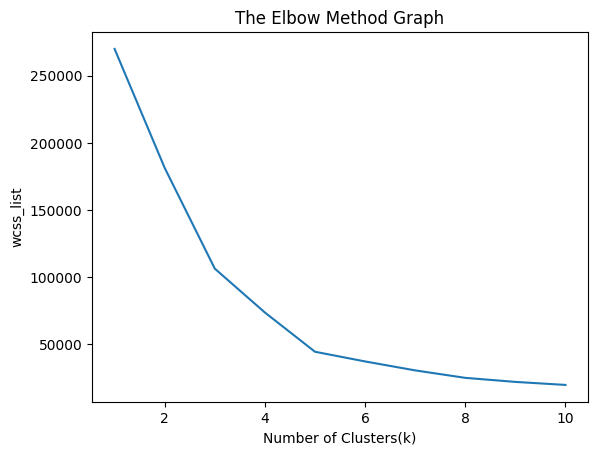

In [14]:
# Finding the optimal number of clusters using elbow method (afterwards no turn is there)
# we import the KMean class of sklearn.cluster library to form the clusters

from sklearn.cluster import KMeans

# Next we have created the xcc_list variable to initialize an empty list,
# which is used to contain the values of wcc computed for different values of k ranging from 1 to 10
# The Graph is called Silhoutte graph
wcc_list=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=1)
    kmeans.fit(x)
    wcc_list.append(kmeans.inertia_) #inertia_ is a predefined attribute of KMeans
plt.plot(range(1,11),wcc_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [15]:
!pip install kneed

In [16]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcc_list,curve='convex',direction='decreasing')
kl.elbow
# Since the elbow point is at 5. So the number of clusters here will be 5

5

In [17]:
# To train the model, we will use the same line of code
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=1)
y_predict=kmeans.fit_predict(x)

# In the second line of code, we have created the dependent variable y_predict to train the model
# By executing the above line of code, we will get the y_predict varianble
y_predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

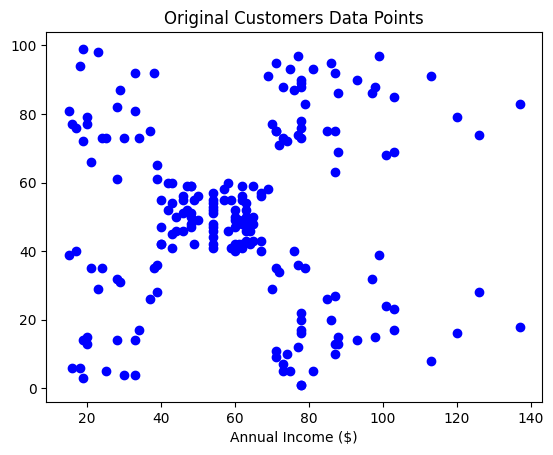

In [18]:
# Visualizing Original Data Points without Clustering

plt.scatter(x[:,0],x[:,1],c='blue',label='All Data Points')
plt.title('Original Customers Data Points')
plt.xlabel('Annual Income ($)')
#plt.ylabel()
plt.show()

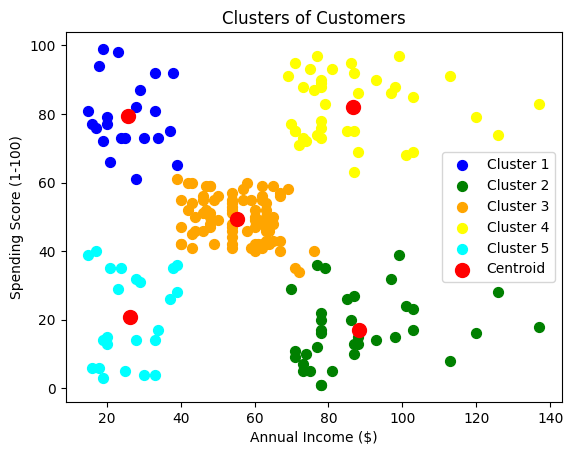

In [19]:
# For first cluster
plt.scatter(x[y_predict==0,0],x[y_predict==0,1],s=50,c='blue',label='Cluster 1')

# For second cluster
plt.scatter(x[y_predict==1,0],x[y_predict==1,1],s=50,c='green',label='Cluster 2')

# For third cluster
plt.scatter(x[y_predict==2,0],x[y_predict==2,1],s=50,c='orange',label='Cluster 3')

# For fourth cluster
plt.scatter(x[y_predict==3,0],x[y_predict==3,1],s=50,c='yellow',label='Cluster 4')

# For fifth cluster
plt.scatter(x[y_predict==4,0],x[y_predict==4,1],s=50,c='cyan',label='Cluster 5')

# Plot the centroid. This time we are going to use the kmeans.cluster_centres_
# Attributes that return here the coordinates of the centroid.

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='red',label='Centroid')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [20]:
# Ultimatelly we can define these cluster according to their annual income and spending scores.
# For instance Cluster 1 has high annual income and low spending score

print(kmeans.cluster_centers_)

[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]
